# Admission of States to the US

## Imports

In [2]:
import pandas as pd
import numpy as np
import re
import datetime as dt
from dateutil.parser import parse
import matplotlib.pyplot as plt
%matplotlib inline



## Read HTML table into a dataframe

Read all tables which match a pattern into a list of dataframes; select the first (and only) dataframe in the list.

In [4]:
df_list = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_U.S._states_by_date_of_admission_to_the_Union',
    match="Massachusetts Bay",
    index_col = 0,
    header=0,
)
df = df_list[0] # only 1 table contains "Massachusetts Bay"
df.head()

,Date(admitted or ratified),Formed from,Unnamed: 3
State,,,
1,Delaware,"December 7, 1787[8](ratified)",Colony of Delaware[b]
2,Pennsylvania,"December 12, 1787[10](ratified)",Proprietary Province of Pennsylvania
3,New Jersey,"December 18, 1787[11](ratified)",Crown Colony of New Jersey
4,Georgia,"January 2, 1788[8](ratified)",Crown Colony of Georgia
5,Connecticut,"January 9, 1788[12](ratified)",Crown Colony of Connecticut


## Clean up the data

Because of the HTML used, the date contains the method of entry into the US, either "(ratified)" or "(admitted)", and some extra information in square brackets. We need to pull the date and the entry method out of that column.

The **parse_date()** function takes the raw date column and parses the date into a standard **datetime.date** object.

After assigning new column names, we add a new column named 'Method', derived from the last 10 characters of the **Date** column. Then we apply the parse_date() function to the existing Date column, replacing the original values.

In [42]:
RX_DATE = r'([A-Z][a-z]+\s+\d{1,2},\s+\d{4})'

def parse_date(column_value):
    match = re.search(RX_DATE, column_value)
    return parse(match.group(1))

df.columns = ['State',  'Date', 'Formed from']
df['Method'] = df['Date'].apply(lambda x: x[-10:])
df['Date'] = df['Date'].apply(parse_date)
df.head()

,State,Date,Formed from,Method
State,,,,
1,Delaware,1787-12-07,Colony of Delaware[b],(ratified)
2,Pennsylvania,1787-12-12,Proprietary Province of Pennsylvania,(ratified)
3,New Jersey,1787-12-18,Crown Colony of New Jersey,(ratified)
4,Georgia,1788-01-02,Crown Colony of Georgia,(ratified)
5,Connecticut,1788-01-09,Crown Colony of Connecticut,(ratified)


## Plot the results

We want to show a time graph of when colonies or territories became states, and distinguish between the original 13 colonies and the rest of the states. 

First we create a date object that is after the last colony ratified the Articles of Confederation, but before the first state was admitted. 

Then we create two Series objects: **ratified** contains the original colonies; **admitted** contains the rest. 

The data are plotted with the **plot_date()** method of **matplotlib.pyplot**, using a different color for each group of states.

<class 'pandas.core.series.Series'>


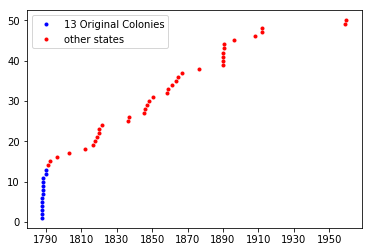

In [43]:
date_sep = dt.date(1791,1,1)
ratified = df['Date'][df['Date'] < date_sep]
admitted = df['Date'][df['Date'] > date_sep]
print(type(ratified))
plt.plot_date(ratified , np.arange(1, len(ratified) + 1), 'b.', label="13 Original Colonies")
plt.plot_date(admitted , np.arange(len(ratified) + 1, len(ratified) + len(admitted) + 1), 'r.', label="other states")
plt.legend()